In [64]:


import lsst.meas.astrom as measAstrom
import lsst.daf.base as dafBase
import lsst.pipe.base as pipeBase
import lsst.daf.persistence as dafPersist
import lsst.afw.table as afwTable



In [170]:


#import lsst.meas.algorithms. as sourceDetector
schema = afwTable.SourceTable.makeMinimalSchema()
table = afwTable.SourceTable.make(afwTable.SourceTable.makeMinimalSchema())

sCatalog1 = afwTable.SourceCatalog.readFits(" /renoir_data_02/jpreyes/lsst_data/CFHTLS_v11/output/deepDiff/05BL01/D3/2005-08-04/r/diaSrc-806535-14.fits")
sCatalog2 = afwTable.SourceCatalog.readFits(" /renoir_data_02/jpreyes/lsst_data/CFHTLS_v11/output/deepDiff/05BL01/D3/2005-08-04/r/diaSrc-806535-14-2.fits")




In [172]:
print(len(sCatalog2))

3144


In [157]:
sigmas = []
for source in sCatalog1:
    sigmas.append(source.get("ip_diffim_NaiveDipoleFlux_pos_fluxSigma"))

    
    

In [158]:
val = np.sum(sigmas)/len(sigmas)
print val

60.7635104059


In [163]:
sources = []
for source in sCatalog1:
    if(source.get("ip_diffim_NaiveDipoleFlux_pos_flux")>5*val):
        sources.append(source.get("ip_diffim_NaiveDipoleFlux_pos_flux"))

    
    

In [164]:
len(sources)

176

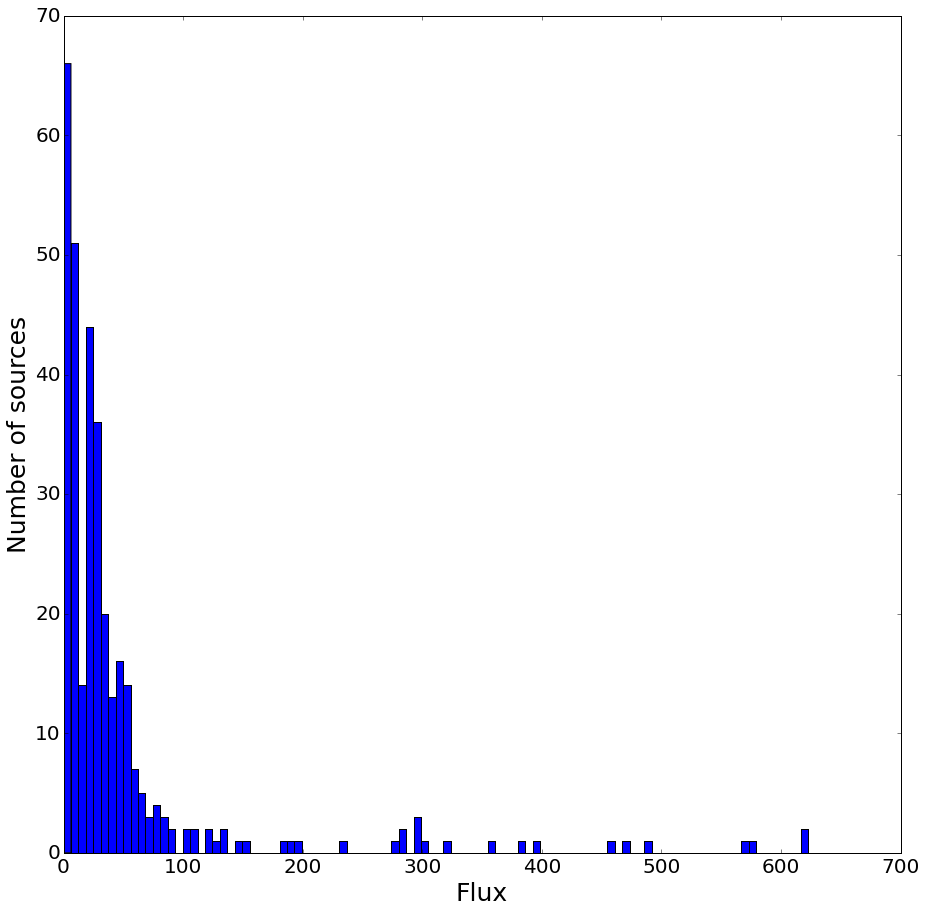

In [83]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plt.hist(sigmas, bins=100)

plt.ylabel("Number of sources", fontsize = "25")
plt.xlabel("Flux", fontsize = "25")
#plt.set_ylim([0,10000])
plt.tick_params(axis='y', labelsize=20)
plt.tick_params(axis='x', labelsize=20)


In [56]:
    
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plt.hist(fluxes, bins=100, range = (0,5000))

plt.ylabel("Number of sources", fontsize = "25")
plt.xlabel("Flux", fontsize = "25")
plt.tick_params(axis='y', labelsize=20)
plt.tick_params(axis='x', labelsize=20)

In [26]:
print sCatalog.schema

Schema(
    (Field['L'](name="id", doc="unique ID"), Key<L>(offset=0, nElements=1)),
    (Field['Angle'](name="coord_ra", doc="position in ra/dec"), Key<Angle>(offset=8, nElements=1)),
    (Field['Angle'](name="coord_dec", doc="position in ra/dec"), Key<Angle>(offset=16, nElements=1)),
    (Field['L'](name="parent", doc="unique ID of parent source"), Key<L>(offset=24, nElements=1)),
    (Field['Flag'](name="flags_negative", doc="set if source was detected as significantly negative"), Key['Flag'](offset=32, bit=0)),
    (Field['F'](name="classification_dipole", doc="probability of being a dipole"), Key<F>(offset=40, nElements=1)),
    (Field['D'](name="ip_diffim_NaiveDipoleCentroid_x", doc="Naive Dipole Centroid", units="pixels"), Key<D>(offset=48, nElements=1)),
    (Field['D'](name="ip_diffim_NaiveDipoleCentroid_y", doc="Naive Dipole Centroid", units="pixels"), Key<D>(offset=56, nElements=1)),
    (Field['Flag'](name="ip_diffim_NaiveDipoleCentroid_flag", doc="general failure flag, set

In [19]:
import  lsst.meas.algorithms as meas_alg
import lsst.afw.image as afwImage

sdTask = meas_alg.SourceDetectionTask()
sdConfig  = meas_alg.SourceDetectionTask.ConfigClass()

table = afwTable.SourceTable.make(afwTable.SourceTable.makeMinimalSchema())
#table.setMetadata(algMetadata)

exp = afwImage.ExposureF("/renoir_data_02/jpreyes/lsst_data/CFHTLS_v11/output/deepDiff/05AL01/D3/2005-06-29/r/diffexp-800718-14.fits")


results = sdTask.makeSourceCatalog(table=table, exposure=exp, doSmooth=not True)
fpsets = sdTask.detectFootprints(exposure=exp, doSmooth=not True)



In [23]:
for source in results.sources:
    print source.get("coord_dec")

nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad
nan rad


In [79]:
for source in sCatalog1:
    print(source.get("base_PeakLikelihoodFlux_flux"))

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


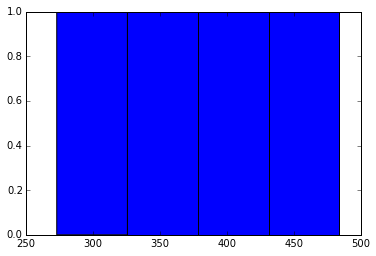

In [41]:

im = afwExposure("/renoir_data_02/jpreyes/lsst_data/CFHTLS_v11/input/raw/05AL01/D3/2005-06-29/r/800717p.fits.fz")
ds9.mtv(im)

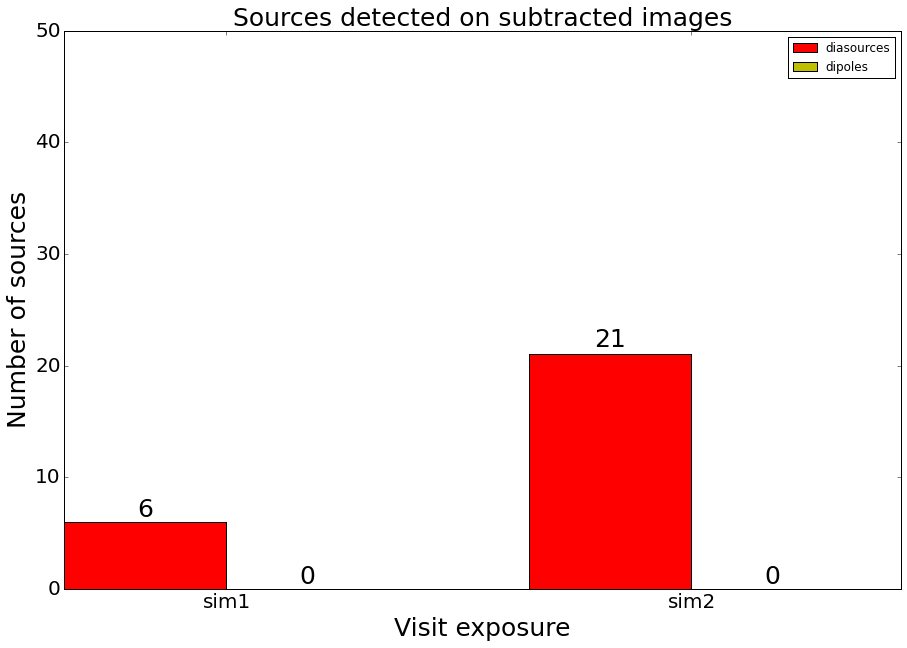

In [15]:
import numpy as np
%matplotlib inline



N = 2
diaSources = (6, 21)
dipoles = (0, 0)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()

fig.set_size_inches(15,10)
fig.set
rects1 = ax.bar(ind, diaSources, width, color='r')


rects2 = ax.bar(ind + width, dipoles, width, color='y')

# add some text for labels, title and axes ticks
ax.set_ylabel('Number of sources', fontsize = "25")
ax.set_xlabel('Visit exposure', fontsize = "25")
ax.set_title('Sources detected on subtracted images', fontsize="25")
ax.set_xticks(ind + width)
ax.set_xticklabels(('sim1', 'sim2'), fontsize="20")
ax.tick_params(axis='y', labelsize=20)

ax.legend((rects1[0], rects2[0]), ('diasources', 'dipoles'))


def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
                '%d' % int(height),
                ha='center', va='bottom', fontsize=25)

ax.set_ylim([0,50])
autolabel(rects1)
autolabel(rects2)

plt.show()

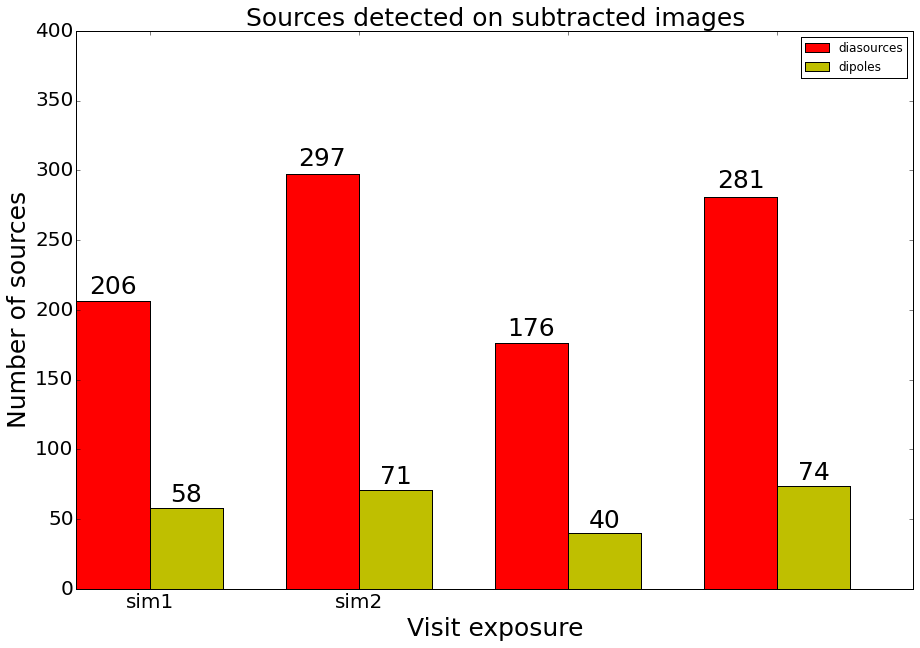

In [166]:
import numpy as np
%matplotlib inline



N = 4
diaSources = (206, 297, 176, 281)
dipoles = (58, 71,40,74)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()

fig.set_size_inches(15,10)
fig.set
rects1 = ax.bar(ind, diaSources, width, color='r')


rects2 = ax.bar(ind + width, dipoles, width, color='y')

# add some text for labels, title and axes ticks
ax.set_ylabel('Number of sources', fontsize = "25")
ax.set_xlabel('Visit exposure', fontsize = "25")
ax.set_title('Sources detected on subtracted images', fontsize="25")
ax.set_xticks(ind + width)
ax.set_xticklabels(('sim1', 'sim2'), fontsize="20")
ax.tick_params(axis='y', labelsize=20)

ax.legend((rects1[0], rects2[0]), ('diasources', 'dipoles'))


def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
                '%d' % int(height),
                ha='center', va='bottom', fontsize=25)

ax.set_ylim([0,400])
autolabel(rects1)
autolabel(rects2)

plt.show()

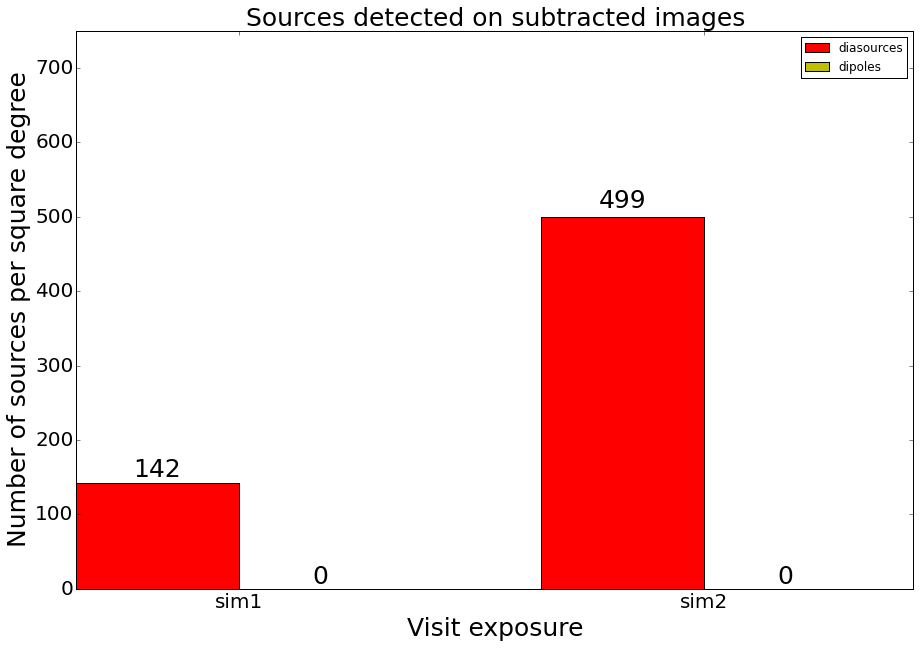

In [17]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt



N = 2
diaSources = (6/0.042, 21/0.042)
dipoles = (0/0.042, 0/0.042)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()

fig.set_size_inches(15,10)
fig.set
rects1 = ax.bar(ind, diaSources, width, color='r')


rects2 = ax.bar(ind + width, dipoles, width, color='y')

# add some text for labels, title and axes ticks
ax.set_ylabel('Number of sources per square degree', fontsize = "25")
ax.set_xlabel('Visit exposure', fontsize = "25")
ax.set_title('Sources detected on subtracted images', fontsize="25")
ax.set_xticks(ind + width)
ax.set_xticklabels(('sim1', 'sim2'), fontsize="20")
ax.tick_params(axis='y', labelsize=20)

ax.legend((rects1[0], rects2[0]), ('diasources', 'dipoles'))


def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
                '%d' % int(height),
                ha='center', va='bottom', fontsize=25)

ax.set_ylim([0,750])
autolabel(rects1)
autolabel(rects2)

plt.show()

In [58]:
simCatalog1 = afwTable.SourceCatalog.readFits("/renoir_data_02/jpreyes/lsst_winter2013/w13_diffim_v11/deepDiff/v6866602-fi/R22/diaSrc-S11.fits")
simCatalog2 = afwTable.SourceCatalog.readFits("/renoir_data_02/jpreyes/lsst_winter2013/w13_diffim_v11/deepDiff/v6866603-fi/R22/diaSrc-S11.fits")




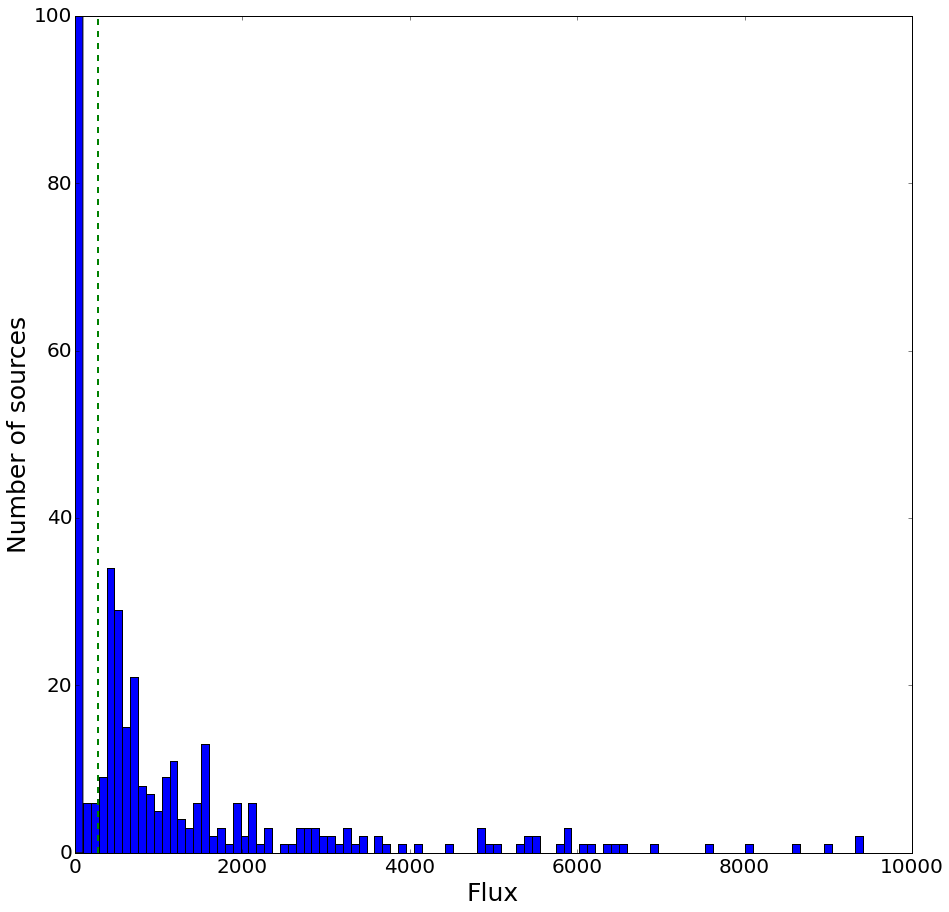

In [92]:
fluxes = []
for source in sCatalog2:
    if(source.get("ip_diffim_NaiveDipoleFlux_pos_flux") < 10000):
        fluxes.append(source.get("ip_diffim_NaiveDipoleFlux_pos_flux"))

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plt.hist(fluxes, bins=100)

plt.ylabel("Number of sources", fontsize = "25")
plt.xlabel("Flux", fontsize = "25")
#plt.set_ylim([0,10000])
plt.tick_params(axis='y', labelsize=20)
plt.tick_params(axis='x', labelsize=20)


plt.axvline(val.mean()*5, color='g', linestyle='dashed', linewidth=2)

In [26]:
print len(simCatalog1)

print len(simCatalog2)
nDipole = 0
for source in simCatalog2:
    if (source.get("classification_dipole") == 1.0):
     nDipole+=1

print nDipole

6
21
0


In [7]:
import lsst.afw.image as afwImage
import lsst.afw.display.ds9 as ds9
exp = afwImage.ExposureF("/renoir_data_02/jpreyes/lsst_data/CFHTLS_v11/output/deepDiff/05AL01/D3/2005-06-29/r/diffexp-800718-14.fits")
ds9.setMaskTransparency(0)
ds9.mtv(exp)